In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pickle

In [3]:
with open(r"E:\ML\Project_2\Project 5\traffic-signs-data\train.p",mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open(r"E:\ML\Project_2\Project 5\traffic-signs-data\valid.p",mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)
with open(r"E:\ML\Project_2\Project 5\traffic-signs-data\test.p",mode = 'rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'],train['labels']
X_validation, y_validation = valid['features'],valid['labels']
X_test , y_test = test['features'],test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

36


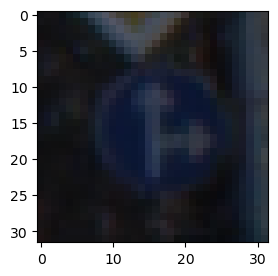

In [6]:
i = 1000
plt.figure(figsize=(3,3))
plt.imshow(X_train[i])
print(y_train[i])

In [7]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [8]:
X_train_gray = np.sum(X_train/3 , axis = 3,keepdims=True)

In [9]:
X_train_gray.shape

(34799, 32, 32, 1)

In [10]:
X_validation_gray = np.sum(X_validation/3 , axis = 3,keepdims=True)
X_test_gray = np.sum(X_test/3 , axis = 3,keepdims=True)

5


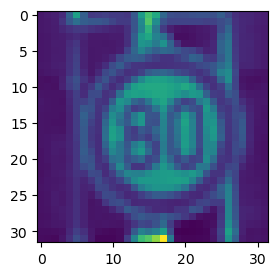

In [11]:
i = 1000
plt.figure(figsize=(3,3))
plt.imshow(X_train_gray[i])
print(y_train[i])

In [12]:
X_train_gray_norm = (X_train_gray-128)/128
X_validation_gray_norm = (X_validation_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128

5


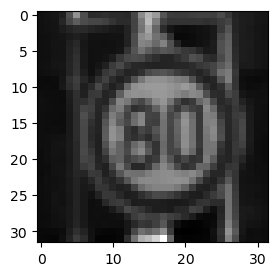

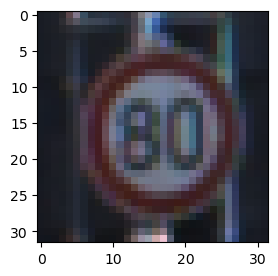

In [13]:
i = 1000
plt.figure(figsize=(3,3))
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray')
print(y_train[i])
plt.figure(figsize=(3,3))
plt.imshow(X_train[i])

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [15]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5),activation='relu',input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters = 16, kernel_size=(5,5),activation='relu'))
cnn_model.add(AveragePooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 43, activation = 'softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [17]:
history = cnn_model.fit(X_train_gray_norm,
              y_train, batch_size= 50, 
              epochs = 80, 
              verbose= 1, 
              validation_data=(X_validation_gray_norm,y_validation)
             )

Epoch 1/80
696/696 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3648 - loss: 2.3630 - val_accuracy: 0.7429 - val_loss: 0.8820
Epoch 2/80
696/696 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8565 - loss: 0.4933 - val_accuracy: 0.8247 - val_loss: 0.6122
Epoch 3/80
696/696 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9164 - loss: 0.2968 - val_accuracy: 0.8376 - val_loss: 0.6073
Epoch 4/80
696/696 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9432 - loss: 0.1976 - val_accuracy: 0.8667 - val_loss: 0.4955
Epoch 5/80
696/696 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9608 - loss: 0.1450 - val_accuracy: 0.8873 - val_loss: 0.4591
Epoch 6/80
696/696 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9677 - loss: 0.1159 - val_accuracy: 0.8646 - val_loss: 0.5847
Epoch 7/80
696/696 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9728 - loss: 0.0890 - val_accuracy: 0.8791 - val_loss: 0.4834
Epoch 8/80
696/696 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9806 - loss: 0.0666 - val_accuracy: 0.

In [19]:
score = cnn_model.evaluate(X_test_gray_norm,y_test)
print("Test Accuracy : {}".format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9225 - loss: 1.3975
Test Accuracy : 0.9210609793663025


In [22]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [31]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

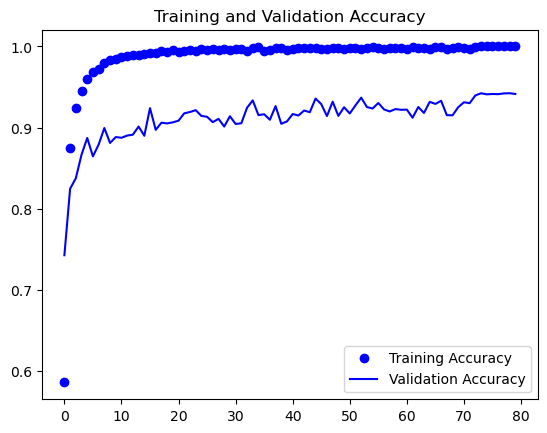

In [29]:
plt.plot(epochs,accuracy,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

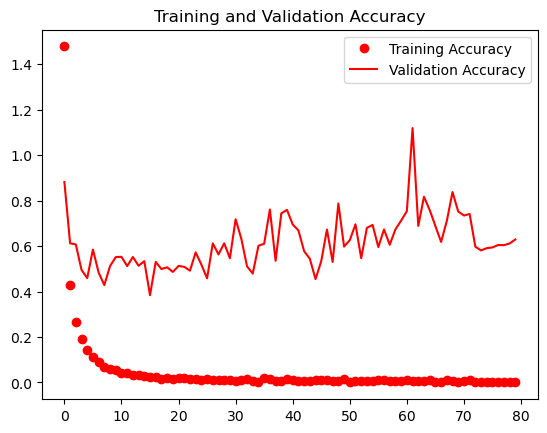

In [32]:
plt.plot(epochs,loss,'ro',label = 'Training Accuracy')
plt.plot(epochs,val_loss,'r',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [37]:
y_pred_probs = cnn_model.predict(X_test_gray_norm)
predicted_classes = np.argmax(y_pred_probs, axis=1)
y_true = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


<Axes: >

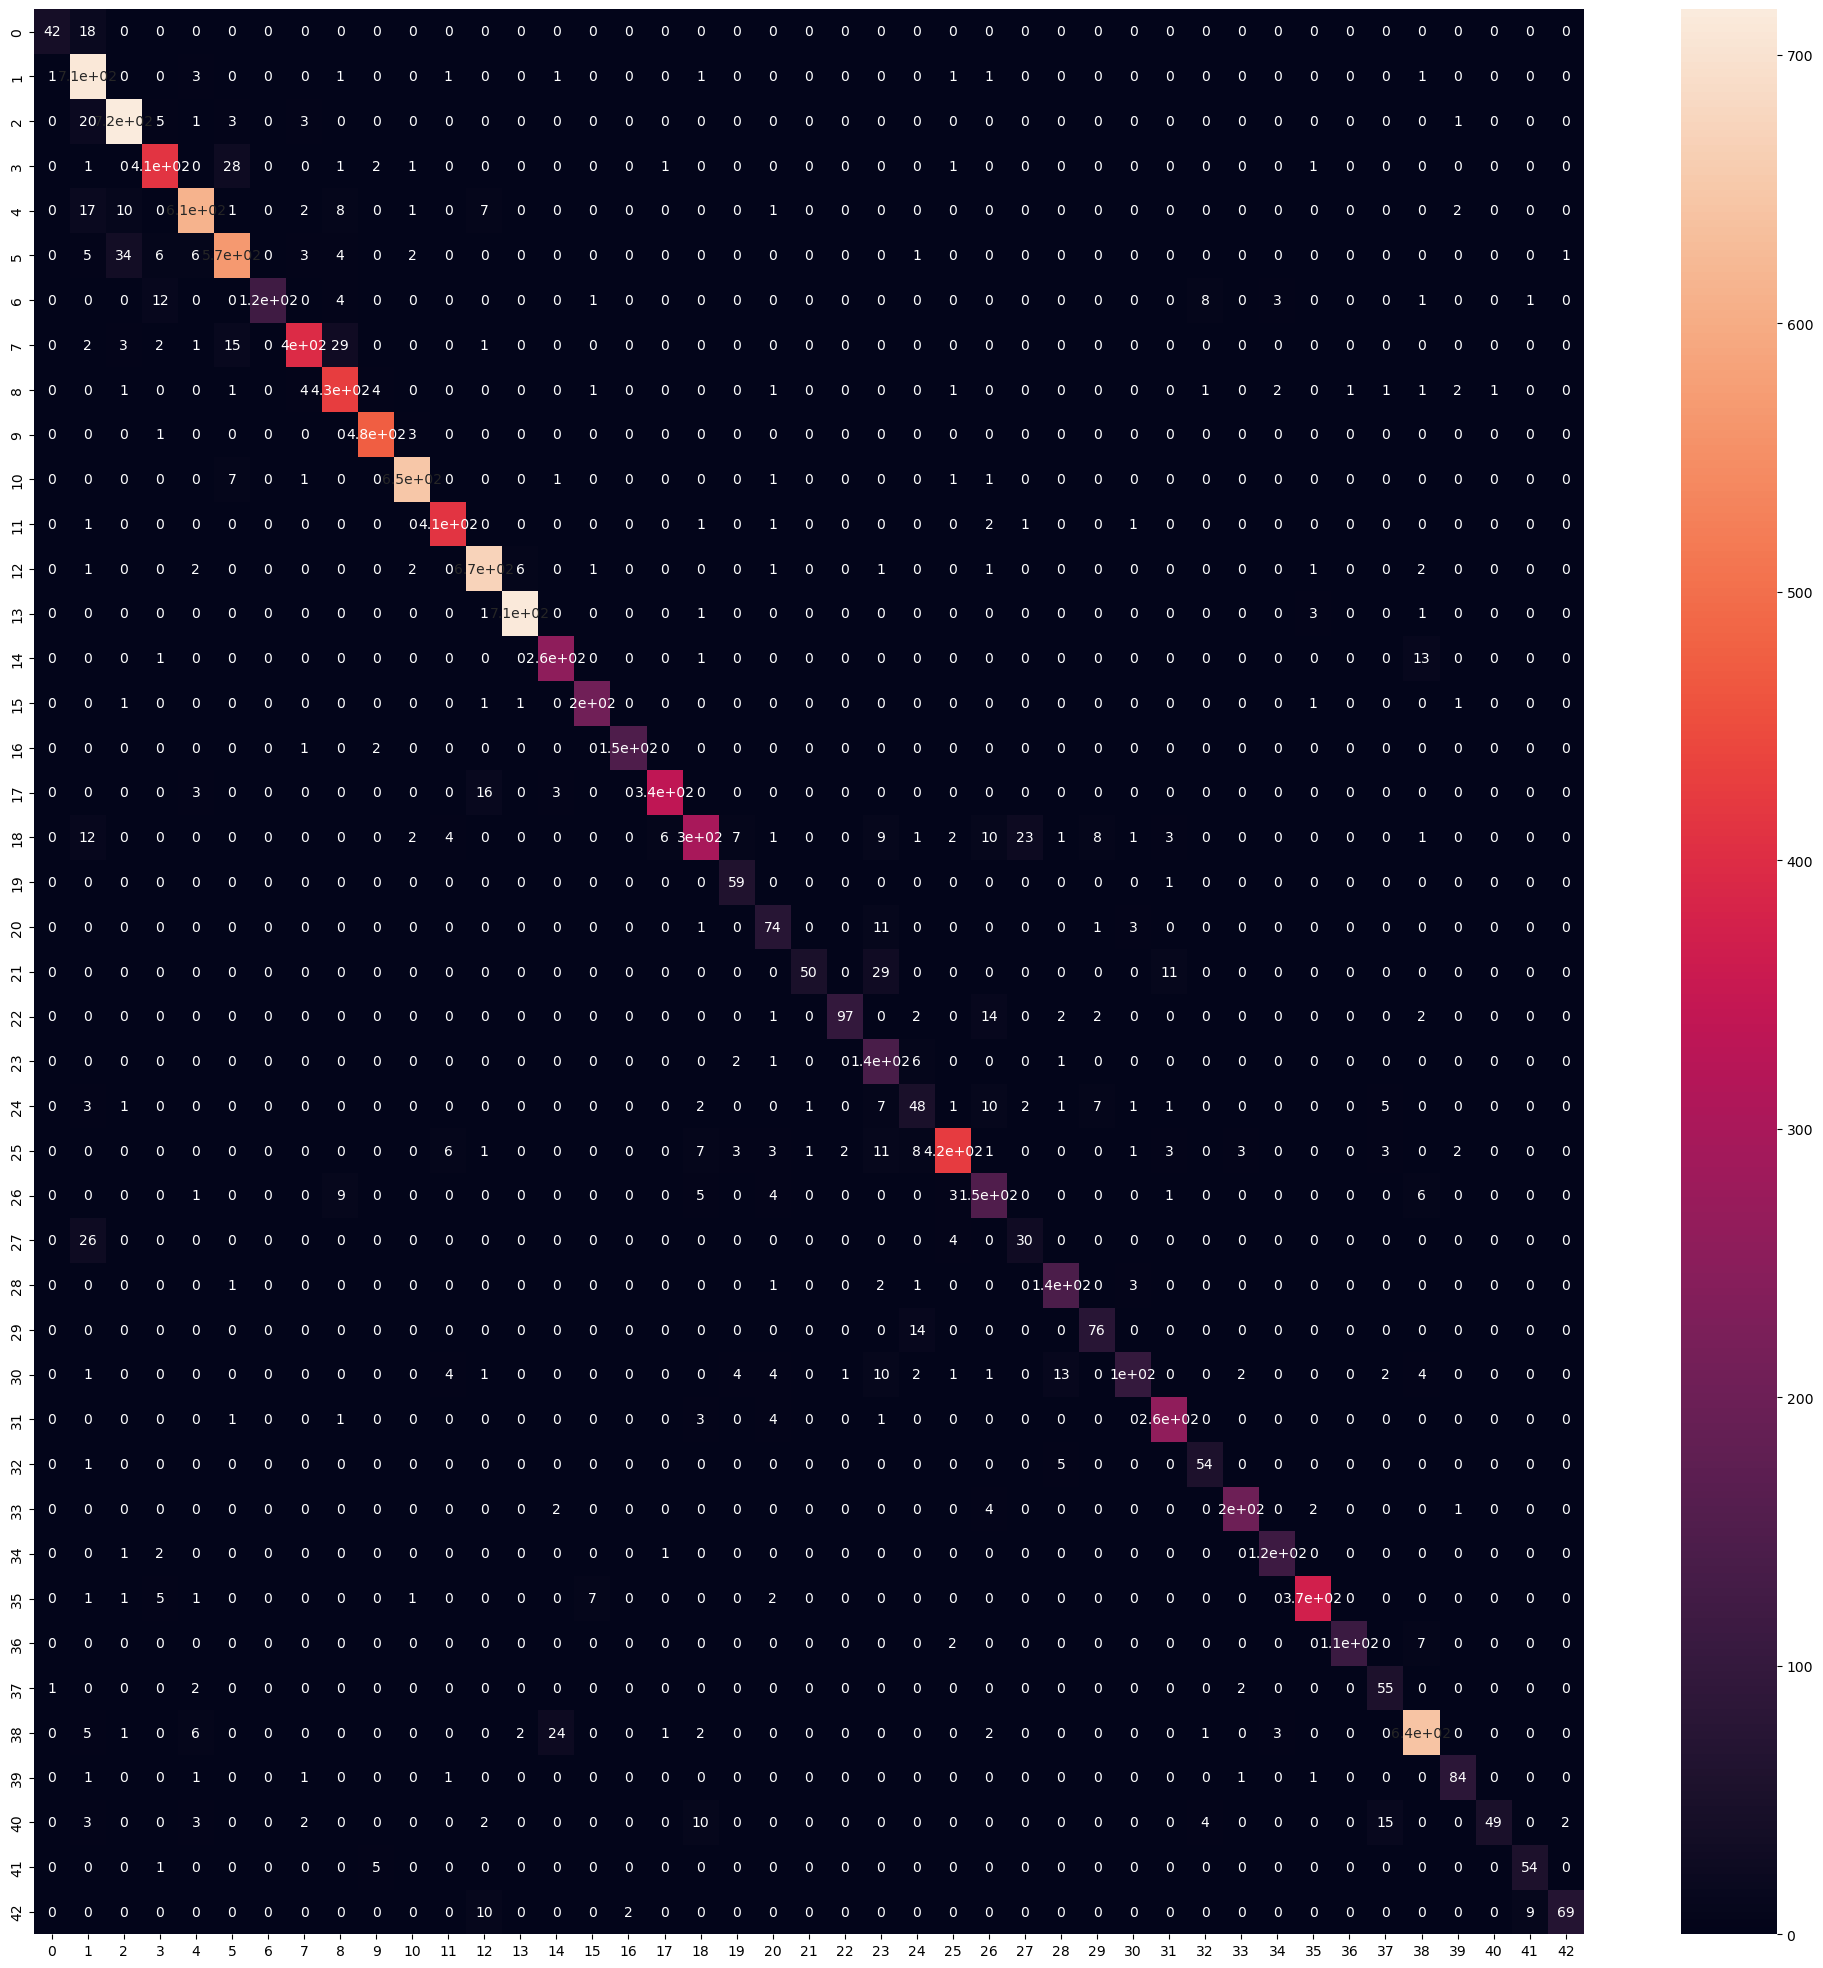

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm,annot = True)

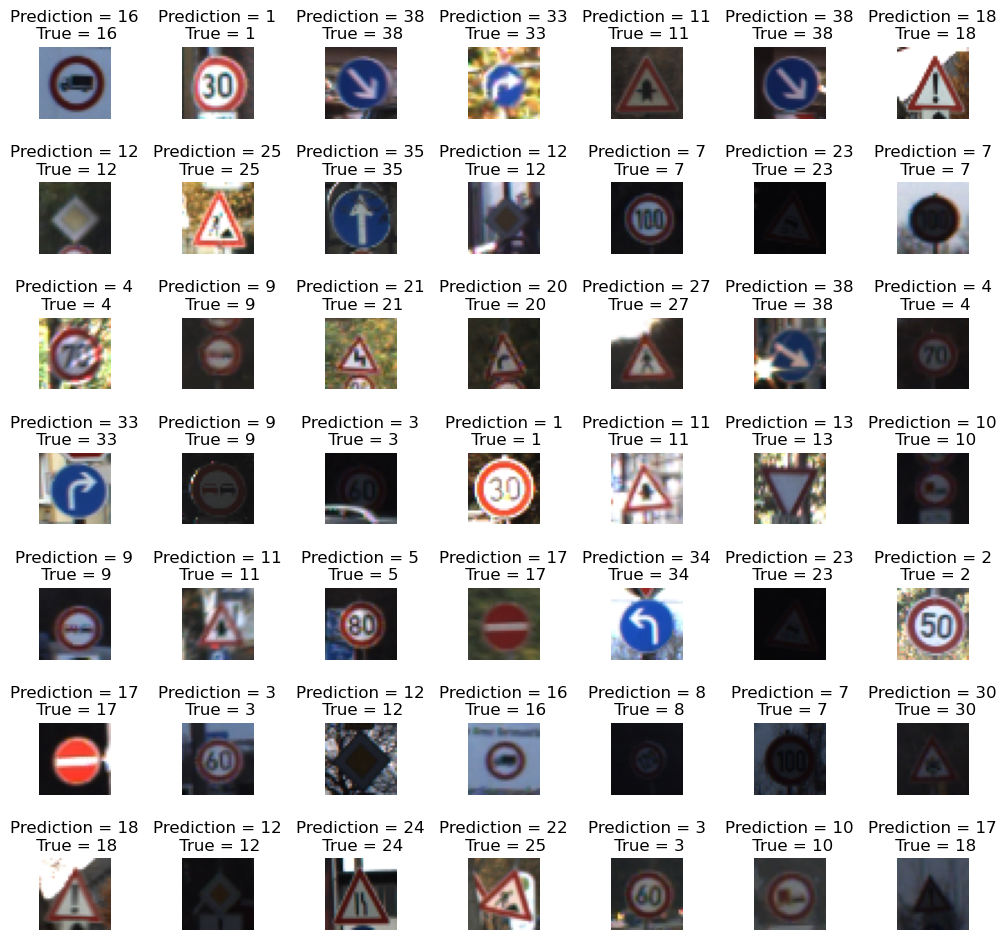

In [41]:
l = 7
w = 7

fig,axes = plt.subplots(l,w,figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0,l*w):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f'Prediction = {predicted_classes[i]}\n True = {y_true[i]}')
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)